In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Lecture des données

In [2]:
DataALL = pd.read_excel("Autos_Mixtes.xlsx",sheet_name="Feuil1",index_col=0)


### Type des variables

In [3]:
print(DataALL.info())
#nombre d'observations
n = DataALL.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, GOLF         to SANTA_FE    
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   puissance  10 non-null     int64 
 1   longueur   10 non-null     int64 
 2   hauteur    10 non-null     int64 
 3   poids      10 non-null     int64 
 4   CO2        10 non-null     int64 
 5   origine    10 non-null     object
 6   carburant  10 non-null     object
 7   4X4        10 non-null     object
dtypes: int64(5), object(3)
memory usage: 720.0+ bytes
None


### Préparation des variables quantitatives DC

In [4]:
DC = DataALL.iloc[:,:5]
p1 = DC.shape[1]
print(DC)

              puissance  longueur  hauteur  poids  CO2
Modele                                                
GOLF                 75       421      149   1217  143
CITRONC4            138       426      146   1381  142
P607                204       491      145   1723  223
VELSATIS            150       486      158   1735  188
CITRONC2             61       367      147    932  141
CHRYS300            340       502      148   1835  291
AUDIA3              102       421      143   1205  168
OUTLAND             202       455      167   1595  237
PTCRUISER           223       429      154   1595  235
SANTA_FE            125       450      173   1757  197


### Standardisation des données: centrage et réduction

In [5]:
ZC = (DC.values-np.mean(DC.values,axis=0))/np.std(DC.values,axis=0)
print(ZC.round(3))  
df = pd.DataFrame(ZC)
df.to_excel("output1.xlsx")  

[[-1.103 -0.614 -0.419 -0.989 -1.127]
 [-0.304 -0.485 -0.733 -0.411 -1.148]
 [ 0.532  1.192 -0.838  0.795  0.558]
 [-0.152  1.063  0.524  0.837 -0.179]
 [-1.28  -2.007 -0.628 -1.993 -1.169]
 [ 2.256  1.476 -0.524  1.189  1.99 ]
 [-0.761 -0.614 -1.047 -1.031 -0.6  ]
 [ 0.507  0.263  1.466  0.344  0.853]
 [ 0.773 -0.408  0.105  0.344  0.811]
 [-0.469  0.134  2.094  0.915  0.011]]


### Préparation des variables qualitatives DD

In [6]:
DD = DataALL.iloc[:,5:]
p2 = DD.shape[1]
print(DD)

             origine carburant  4X4
Modele                             
GOLF          Europe    Diesel  non
CITRONC4      France    Diesel  non
P607          France    Diesel  non
VELSATIS      France    Diesel  non
CITRONC2      France   Essence  non
CHRYS300      Autres   Essence  non
AUDIA3        Europe   Essence  non
OUTLAND       Autres    Diesel  oui
PTCRUISER     Autres   Essence  non
SANTA_FE      Autres    Diesel  oui


### Codage des données = Tableau disjonctif des données

In [7]:
DDcoding = pd.get_dummies(DD)
display(DDcoding)
DDcoding.to_excel("output.xlsx")  

,origine_Autres,origine_Europe,origine_France,carburant_Diesel,carburant_Essence,4X4_non,4X4_oui
Modele,,,,,,,
GOLF,0,1,0,1,0,1,0
CITRONC4,0,0,1,1,0,1,0
P607,0,0,1,1,0,1,0
VELSATIS,0,0,1,1,0,1,0
CITRONC2,0,0,1,0,1,1,0
CHRYS300,1,0,0,0,1,1,0
AUDIA3,0,1,0,0,1,1,0
OUTLAND,1,0,0,1,0,0,1
PTCRUISER,1,0,0,0,1,1,0


In [8]:
#proportions
p_k = np.mean(DDcoding.values,axis=0)
print(p_k)

[0.4 0.2 0.4 0.6 0.4 0.8 0.2]


In [9]:
#standardisation des indicatrices
ZD = DDcoding.values/np.sqrt(p_k)
display(ZD.round(3))
df1 = pd.DataFrame(ZD)
df1.to_excel("output2.xlsx")  

array([[0.   , 2.236, 0.   , 1.291, 0.   , 1.118, 0.   ],
       [0.   , 0.   , 1.581, 1.291, 0.   , 1.118, 0.   ],
       [0.   , 0.   , 1.581, 1.291, 0.   , 1.118, 0.   ],
       [0.   , 0.   , 1.581, 1.291, 0.   , 1.118, 0.   ],
       [0.   , 0.   , 1.581, 0.   , 1.581, 1.118, 0.   ],
       [1.581, 0.   , 0.   , 0.   , 1.581, 1.118, 0.   ],
       [0.   , 2.236, 0.   , 0.   , 1.581, 1.118, 0.   ],
       [1.581, 0.   , 0.   , 1.291, 0.   , 0.   , 2.236],
       [1.581, 0.   , 0.   , 0.   , 1.581, 1.118, 0.   ],
       [1.581, 0.   , 0.   , 1.291, 0.   , 0.   , 2.236]])

### Concaténation des deux ensembles : Z =ZC |ZD

In [10]:
Z = np.concatenate((ZC,ZD),axis=1)
display(Z.round(3))

array([[-1.103, -0.614, -0.419, -0.989, -1.127,  0.   ,  2.236,  0.   ,
         1.291,  0.   ,  1.118,  0.   ],
       [-0.304, -0.485, -0.733, -0.411, -1.148,  0.   ,  0.   ,  1.581,
         1.291,  0.   ,  1.118,  0.   ],
       [ 0.532,  1.192, -0.838,  0.795,  0.558,  0.   ,  0.   ,  1.581,
         1.291,  0.   ,  1.118,  0.   ],
       [-0.152,  1.063,  0.524,  0.837, -0.179,  0.   ,  0.   ,  1.581,
         1.291,  0.   ,  1.118,  0.   ],
       [-1.28 , -2.007, -0.628, -1.993, -1.169,  0.   ,  0.   ,  1.581,
         0.   ,  1.581,  1.118,  0.   ],
       [ 2.256,  1.476, -0.524,  1.189,  1.99 ,  1.581,  0.   ,  0.   ,
         0.   ,  1.581,  1.118,  0.   ],
       [-0.761, -0.614, -1.047, -1.031, -0.6  ,  0.   ,  2.236,  0.   ,
         0.   ,  1.581,  1.118,  0.   ],
       [ 0.507,  0.263,  1.466,  0.344,  0.853,  1.581,  0.   ,  0.   ,
         1.291,  0.   ,  0.   ,  2.236],
       [ 0.773, -0.408,  0.105,  0.344,  0.811,  1.581,  0.   ,  0.   ,
         0.   ,  1.581, 

In [11]:
[list(DC.columns)+list(DDcoding.columns)]

[['puissance',
  'longueur',
  'hauteur',
  'poids',
  'CO2',
  'origine_Autres',
  'origine_Europe',
  'origine_France',
  'carburant_Diesel',
  'carburant_Essence',
  '4X4_non',
  '4X4_oui']]

In [12]:
# Dimension de la matrice de données préparées
p = Z.shape[1]

### Analyse AFDM

In [13]:
#classe de calcul
from fanalysis.pca import PCA

#instanciation - les données sont déjà standardisées
afdm = PCA(std_unit=False,row_labels=DataALL.index,col_labels=[DC.columns,DDcoding.columns])

#lancement des calculs
afdm.fit(Z)
None

/Users/nmezghani/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3943: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


In [14]:
print(DC.columns)

Index(['puissance', 'longueur', 'hauteur', 'poids', 'CO2'], dtype='object')


In [15]:
print(DDcoding.columns)

Index(['origine_Autres', 'origine_Europe', 'origine_France',
       'carburant_Diesel', 'carburant_Essence', '4X4_non', '4X4_oui'],
      dtype='object')


### Nombre max d'axes à retenir

In [16]:
Fmax = p - p2
print('Le nombre maximum de facteurs principaux est égal à', Fmax)

Le nombre maximum de facteurs principaux est égal à 9


### Affichage des valeurs propres et de la variance

In [17]:
#affichage des valeurs propres
print(afdm.eig_[0].round(3))
df2 = pd.DataFrame(afdm.eig_)
df2.to_excel("output3.xlsx")  

[4.273e+00 2.122e+00 1.439e+00 8.360e-01 1.640e-01 1.140e-01 3.400e-02
 1.600e-02 2.000e-03 0.000e+00]


In [18]:
display(pd.DataFrame(np.transpose(afdm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Fmax+2)))

,Val.P,%,Cumul %
1,4.273136e+00,4.747928e+01,47.479285
2,2.121887e+00,2.357653e+01,71.055811
3,1.438718e+00,1.598575e+01,87.041565
4,8.363671e-01,9.292968e+00,96.334533
5,1.640301e-01,1.822556e+00,98.157089
6,1.144703e-01,1.271892e+00,99.428982
7,3.362515e-02,3.736128e-01,99.802594
8,1.580522e-02,1.756136e-01,99.978208
9,1.961281e-03,2.179201e-02,100.000000
10,2.287497e-32,2.541663e-31,100.000000


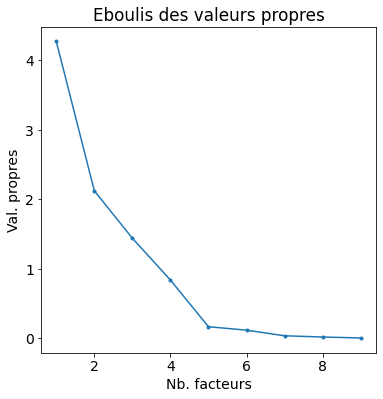

In [19]:
plt.rcParams.update({'font.size': 14})
#éboulis des v.p.
fix,ax = plt.subplots(figsize=(6,6))
ax.plot(range(1,Fmax+1),afdm.eig_[0][:Fmax],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")

plt.show()

### Représentaion des individus dans le plan factoriel

In [20]:
#coordonnées des individus sur les deux premiers axes factoriels
print(pd.DataFrame(afdm.row_coord_[:,:2],index=DD.index,columns=['Coord.F1','Coord.F2']))

              Coord.F1  Coord.F2
Modele                          
GOLF          2.317805 -0.687271
CITRONC4      1.445368 -0.122286
P607         -0.779731  1.018563
VELSATIS     -0.541063 -0.160059
CITRONC2      3.275864  0.025117
CHRYS300     -2.957705  2.628112
AUDIA3        2.316133  0.795341
OUTLAND      -2.255919 -1.840426
PTCRUISER    -0.931809  1.090852
SANTA_FE     -1.888943 -2.747943


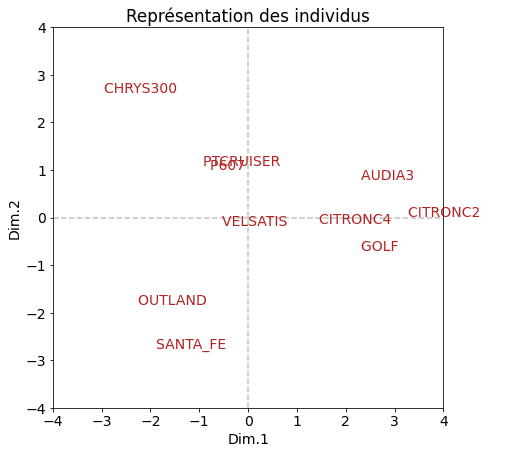

In [21]:
fix,ax = plt.subplots(figsize=(7,7))
ax.axis([-4,+4,-4,+4])
ax.plot([-4,+4],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-4,+4],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Représentation des individus")
for i in range(DD.shape[0]):
    ax.text(afdm.row_coord_[i,0],afdm.row_coord_[i,1],DD.index[i],color='firebrick')        
plt.show()

In [22]:
#coordonnées des variables-modalités
print(pd.DataFrame(afdm.col_coord_[:,:2],columns=['F1','F2'],index=[list(DC.columns)+list(DDcoding.columns)]))

                         F1        F2
puissance         -0.819345  0.539186
longueur          -0.796182  0.244889
hauteur           -0.578377 -0.763585
poids             -0.929516  0.061131
CO2               -0.890662  0.378984
origine_Autres    -0.614538 -0.094369
origine_Europe     0.501259  0.016589
origine_France     0.260095  0.082639
carburant_Diesel  -0.106325 -0.402313
carburant_Essence  0.130221  0.492730
4X4_non            0.224177  0.352170
4X4_oui           -0.448355 -0.704340


### Carré des corrélations des variables quantitatives : $r^2$

In [23]:
#carré corrélations des variables quantitatives avec F1
corr2F1 = (np.corrcoef(afdm.row_coord_[:,0],DC.values,rowvar=False)**2)[0,1:]
print(corr2F1)

[0.67132603 0.6339052  0.33451975 0.86400031 0.79327801]


In [24]:
corr2F2 = (np.corrcoef(afdm.row_coord_[:,1],DC.values,rowvar=False)**2)[0,1:]
print(corr2F2)

[0.29072151 0.05997081 0.583062   0.00373703 0.14362903]


### Carré des corrélations des variables qualitatives : $\eta^2$

In [25]:
display(afdm.row_coord_[:,0])

array([ 2.31780488,  1.44536838, -0.77973114, -0.54106289,  3.27586403,
       -2.95770457,  2.31613266, -2.25591897, -0.93180905, -1.88894333])

In [26]:
#data frame temporaire  pour l'axe 1
temp = DD.copy()
temp['F1'] = afdm.row_coord_[:,0]

#carré du rapport de corrélation pour origine
eta_origineF1 = np.sum((pd.pivot_table(temp,values='F1',index='origine').values[:,0]**2)*p_k[:3])/afdm.eig_[0][0]
print(eta_origineF1)

#carré du rapport de corrélation pour carburant
eta_carburantF1 = np.sum((pd.pivot_table(temp,values='F1',index='carburant').values[:,0]**2)*p_k[3:5])/afdm.eig_[0][0]
print(eta_carburantF1)

#carré du rapport de corrélation pour 4X4
eta_4X4F1 = np.sum((pd.pivot_table(temp,values='F1',index='4X4').values[:,0]**2)*p_k[5:])/afdm.eig_[0][0]
print(eta_4X4F1)

0.6965665387607461
0.028262312028001363
0.2512774715903158


In [27]:
#data frame temporaire  pour l'axe 2
temp = DD.copy()
temp['F1'] = afdm.row_coord_[:,1]

#carré du rapport de corrélation pour origine
eta_origineF2 = np.sum((pd.pivot_table(temp,values='F1',index='origine').values[:,0]**2)*p_k[:3])/afdm.eig_[0][1]
print(eta_origineF2)

#carré du rapport de corrélation pour carburant
eta_carburantF2 = np.sum((pd.pivot_table(temp,values='F1',index='carburant').values[:,0]**2)*p_k[3:5])/afdm.eig_[0][1]
print(eta_carburantF2)

#carré du rapport de corrélation pour 4X4
eta_4X4F2 = np.sum((pd.pivot_table(temp,values='F1',index='4X4').values[:,0]**2)*p_k[5:])/afdm.eig_[0][1]
print(eta_4X4F2)

0.01600996760293858
0.4046388988769229
0.6201180649628444


In [28]:
#test
display(pd.DataFrame(np.transpose(afdm.eig_),columns=['Val.P','%','Cumul %'],index=range(1,Fmax+2)))

,Val.P,%,Cumul %
1,4.273136e+00,4.747928e+01,47.479285
2,2.121887e+00,2.357653e+01,71.055811
3,1.438718e+00,1.598575e+01,87.041565
4,8.363671e-01,9.292968e+00,96.334533
5,1.640301e-01,1.822556e+00,98.157089
6,1.144703e-01,1.271892e+00,99.428982
7,3.362515e-02,3.736128e-01,99.802594
8,1.580522e-02,1.756136e-01,99.978208
9,1.961281e-03,2.179201e-02,100.000000
10,2.287497e-32,2.541663e-31,100.000000


In [30]:
#data frame temporaire
df = DD.copy()
df['F1'] = afdm.row_coord_[:,0]
df['F2'] = afdm.row_coord_[:,1]

#moyennes conditionnelles
pd.pivot_table(df,values=['F1','F2'],index='origine')

,F1,F2
origine,,
Autres,-2.008594,-0.217351
Europe,2.316969,0.054035
France,0.850110,0.190334


In [31]:
x1=[0.67132603,0.6339052,0.33451975,0.86400031,0.79327801,0.6965665387607461,
0.028262312028001363,0.2512774715903158]
x2=[0.29072151,0.05997081,0.583062,0.00373703,0.14362903,0.01600996760293858,
0.4046388988769229,0.6201180649628444]

In [32]:
#plt.scatter(x1,x2,)

In [33]:
print(DataALL.columns)

Index(['puissance', 'longueur', 'hauteur', 'poids', 'CO2', 'origine',
       'carburant', '4X4'],
      dtype='object')


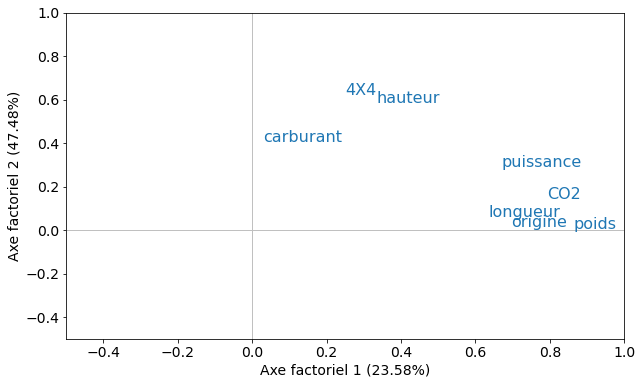

In [34]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,6))
plt.rcParams.update({'font.size': 16})
axes.set_xlim(-0.5,1) #même limites en abscisse
axes.set_ylim(-0.5,1) #et en ordonnée
#placement des étiquettes des observations
for i in range(8):
    plt.annotate(DataALL.columns[i],(x1[i],x2[i]), color='#1f77b4' )
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
plt.ylabel("Axe factoriel 2 (47.48%)")
plt.xlabel("Axe factoriel 1 (23.58%)" )
#affichage
plt.show()

In [35]:
def biplot(afdm,RowName,ColomnName) :
    plt.subplots(figsize=(10,10))

    xs = afdm.row_coord_[:,0]
    ys = afdm.row_coord_[:,1]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())

    plt.scatter(xs*scalex,ys*scaley)
    for i in range(DD.shape[0]):
        plt.text(xs[i]*scalex, ys[i]*scaley * 1.15,DD.index[i],color='#1f77b4')  

    for i in range(len(ColomnName[0])) :
        plt.arrow(0, 0, afdm.col_coord_[i,0],afdm.col_coord_[i,1], head_width=0.05, head_length=0.05,color='g',alpha=0.8)
        plt.text(afdm.col_coord_[i,0],afdm.col_coord_[i,1],ColomnName[0][i],color='g')        

    plt.title("Représentation des individus et des variables")
    ax.set_xlabel("Dim.1")
    ax.set_ylabel("Dim.2")
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.grid()
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')

    plt.show()

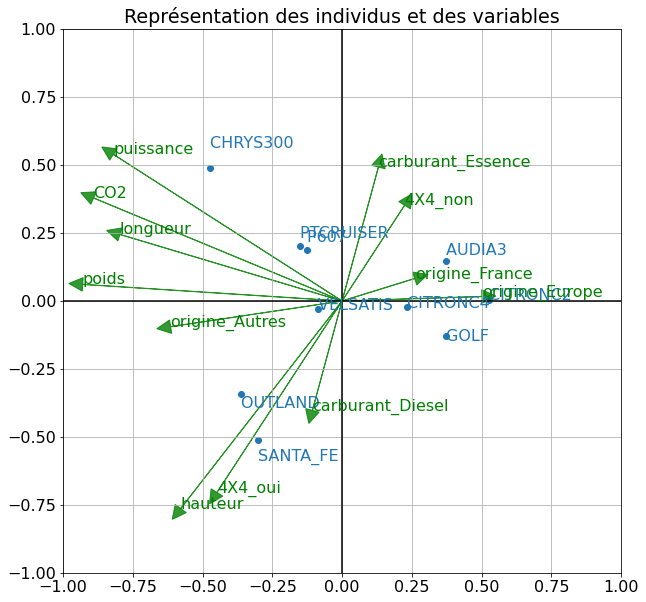

In [36]:
ColomnName=[list(DC.columns)+list(DDcoding.columns)]
RowName=DD.index
biplot(afdm,RowName,ColomnName)